Link tập dữ liệu
https://drive.google.com/drive/folders/1R-2Gxv9OiCYrgGvN2zf6EP4ZSDlhqcbD?usp=sharing

In [34]:
# Cài đặt thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os
from sklearn import svm
import random
from tensorflow import keras
from sklearn.metrics import f1_score, roc_auc_score, log_loss, accuracy_score, confusion_matrix


In [3]:
# Đọc dữ liệu từ file csv
# Bạn có thể thay đổi địa chỉ tập dữ liệu đầu vào ở đây
train_df = pd.read_csv('D:\FPTUni\SP24\MAI391\Project\Data\mnist_train.csv',header=None)
test_df = pd.read_csv('D:\FPTUni\SP24\MAI391\Project\Data\mnist_test.csv',header=None)

In [ ]:
# Thể hiện một số dòng dữ liệu hoặc thông tin
train_df.head(10)

In [61]:
# Thể hiện một số dòng dữ liệu hoặc thông tin
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Thể hiện thông tin của dữ liệu
print("traing data shape:",train_df.shape)
print("test  data  shape:",test_df.shape)

traing data shape: (60000, 785)
test  data  shape: (10000, 785)


Till now we have loaded our train and test datasets. We have 60000 2d (28x28) images in our training dataset and 10000 in test dataset.

columns of training data from 1 to 784 represents the pixel values and column 0 represents the corrosponding label, same goes for test data.

In [59]:
# Kiểm tra dữ liệu có giá trị thiếu không
x = train_df.isnull().sum()>0
print(x.sum())
x = test_df.isnull().sum()>0
print(x.sum())

0
0


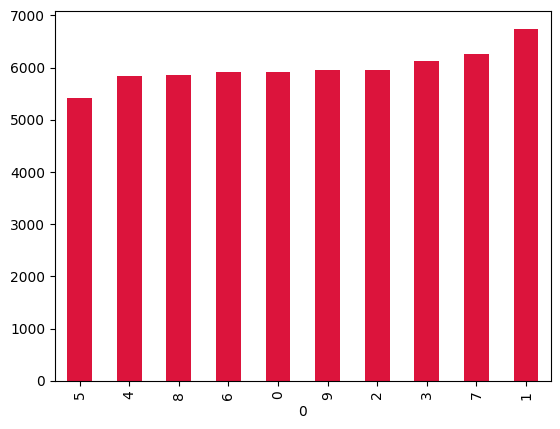

In [58]:
train_df[0].value_counts(ascending=True).plot.bar(color='crimson');

In [75]:
x_train = train_df.drop(0,axis=1).values
# Loại bỏ cột label và lấy giá trị
# Đưa dữ liệu về giá trị từ 0 đến 1
x_train = x_train/255
y_train = train_df[0].values

x_test = test_df.drop(0,axis=1).values
# Loại bỏ cột label và lấy giá trị
# Đưa dữ liệu về giá trị từ 0 đến 1
x_test = x_test/255
y_test = test_df[0].values

4


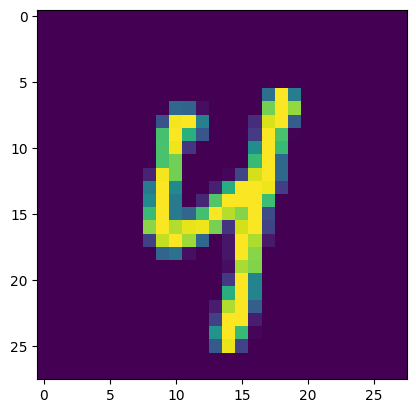

In [98]:
# Xem thử một dòng dữ liệu
print(y_train[2222])
plt.imshow(x_train[2222].reshape(28,28));

Tạo mô hình dựa trên keras

In [ ]:
import tensorflow.keras as keras

# Định nghĩa mô hình Neural Network
model = keras.Sequential([
    # Lớp đầu tiên: Fully connected layer với 128 đơn vị neuron và hàm kích hoạt ReLU
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    
    # Lớp đầu ra: Fully connected layer với 10 đơn vị neuron và hàm kích hoạt sigmoid
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer='adam',              # Sử dụng thuật toán tối ưu hóa Adam
              loss='sparse_categorical_crossentropy',  # Hàm mất mát cho bài toán phân loại nhiều lớp
              metrics=['accuracy'])           # Đánh giá hiệu suất bằng accuracy

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(x_train,                           # Dữ liệu đầu vào
          y_train,                           # Nhãn tương ứng
          epochs=15)                         # Số lượng epochs (lặp lại tập dữ liệu)


In [47]:
# Tính toán độ chính xác trên tập kiểm thử và xuất nó dưới dạng phần trăm
model.evaluate(x_test, y_test)[1]*100

313/313 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9778


97.78000116348267

In [48]:
# Tạo dự đoán
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 956us/step


In [ ]:
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='Blues');

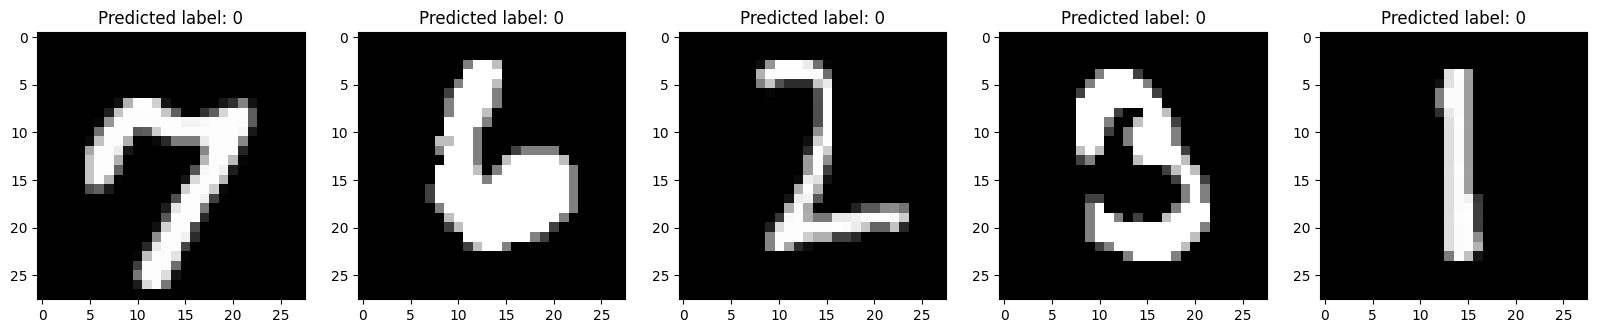

In [105]:
# Thử với một số hình ảnh random
# Chọn ngẫu nhiên 5 hình ảnh từ tập dữ liệu kiểm tra
random_indices = random.sample(range(len(x_test)), 5)

# Hiển thị hình ảnh và nhãn dự đoán tương ứng của chúng
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')  # Hiển thị hình ảnh (reshape từ vectơ 1D thành ma trận 2D)
    plt.title('Predicted label: {}'.format(np.argmax(y_pred[idx])))  # Hiển thị nhãn dự đoán
plt.show()


tạo mô hình dựa vào svm

In [109]:
# Tạo một bộ phân loại SVM
clf = svm.SVC(kernel='linear')

In [110]:
# Huấn luyện mô hình trên tập dữ liệu huấn luyện
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [114]:
# Dự đoán nhãn cho tập dữ liệu kiểm tra
y_pred = clf.predict(x_test)

In [115]:
# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9404


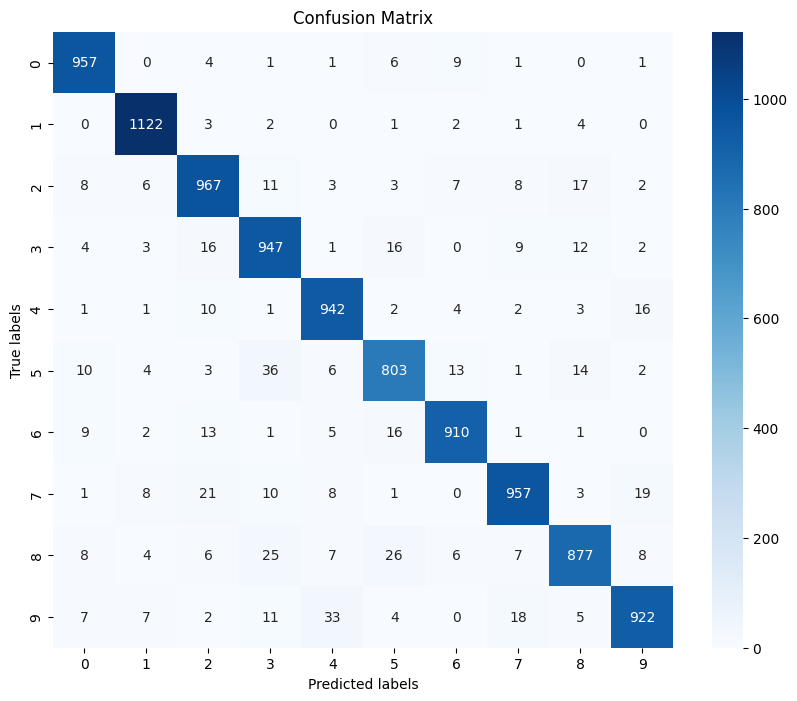

In [116]:
# Hiển thị ma trận confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()